In [1]:
import pandas as pd
import plotly.express as px

In [2]:
Datos = \
    pd.read_csv("../Datasets/1. Microdatos de Migración Colombia (2021).csv",\
        sep=";")

In [3]:
Top10Paises = Datos.groupby(["País Destino Procedencia"])\
    .size().to_frame().rename(columns={0:"Count"}).reset_index()\
    .sort_values(by="Count",ascending=False).head(10)
    
Top10Motivos = Datos.groupby(["Motivo Viaje"])\
    .size().to_frame().rename(columns={0:"Count"}).reset_index()\
    .sort_values(by="Count",ascending=False).head(10)

In [4]:
ListaPaises = Top10Paises["País Destino Procedencia"].tolist()
ListaMotivos = Top10Motivos["Motivo Viaje"].unique().tolist()

FiltroPaises = Datos["País Destino Procedencia"].isin(ListaPaises)
FiltroMotivos = Datos["Motivo Viaje"].isin(ListaMotivos)

In [5]:
DataGroup = Datos.groupby(["País Destino Procedencia"])["Motivo Viaje"].value_counts()
DataGroupII = DataGroup.to_frame().rename(columns={"Motivo Viaje":"Count"}).reset_index()\
    .sort_values(by="Count",ascending=False).head(10)

In [6]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [7]:
#pio.renderers.default = "notebook"
pio.renderers.default = "jupyterlab"

In [8]:
DatosII = Datos.loc[FiltroPaises & FiltroPaises].copy().reset_index(drop=True)

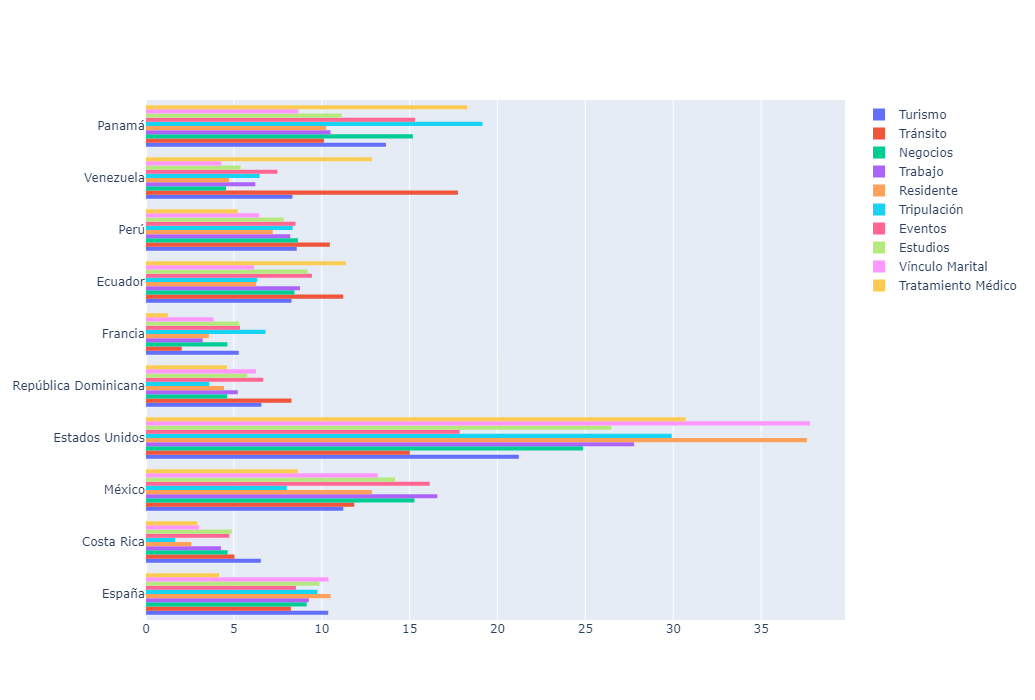

In [9]:
fig = go.Figure()

for Motivo in ListaMotivos:
    fig.add_trace(go.Histogram(
        y=DatosII.loc[(DatosII["País Destino Procedencia"].isin(ListaPaises)) & (DatosII["Motivo Viaje"]==Motivo),\
            "País Destino Procedencia"],
        histnorm='percent',
        name=Motivo, # name used in legend and hover labels
    ))

fig.update_layout(
    autosize=False,
    width=900,
    height=700)

fig.show()

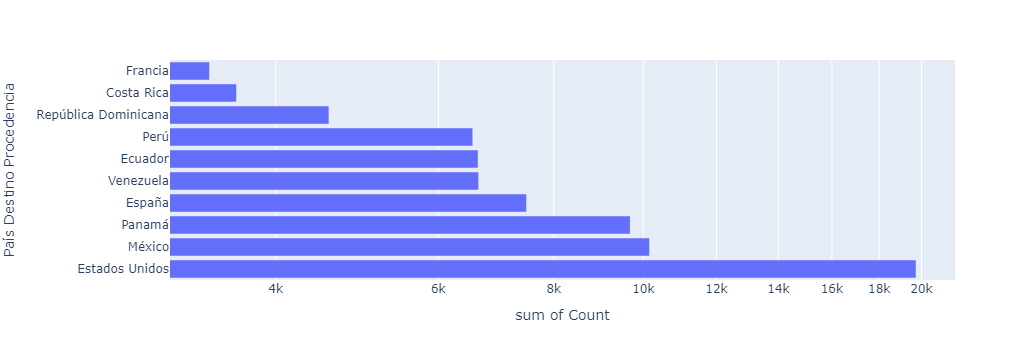

In [10]:
fig = px.histogram(data_frame=Top10Paises,y="País Destino Procedencia", x="Count",\
    log_x=True)
fig.show()

In [11]:
DatosIII = DatosII.loc[(DatosII["País Destino Procedencia"].isin(ListaPaises))&(DatosII["Motivo Viaje"].isin(ListaMotivos))]

In [12]:
# fig = px.line_polar(data_frame=DatosIII, r='País Destino Procedencia', theta='Motivo Viaje', line_close=True)
# fig.show()

In [13]:
DatosIII['Motivo Viaje'].unique()

array(['Turismo', 'Tránsito', 'Estudios', 'Residente', 'Trabajo',
       'Tripulación', 'Negocios', 'Vínculo Marital', 'Tratamiento Médico',
       'Eventos'], dtype=object)

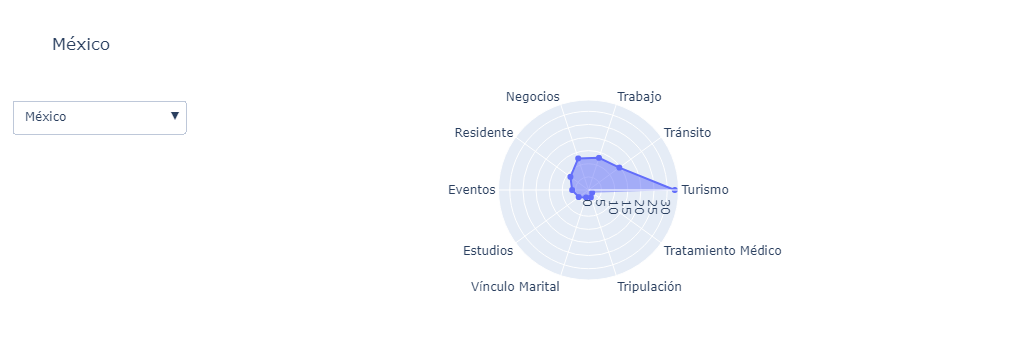

In [48]:
fig = go.Figure()

for Pais in ListaPaises:

    fig.add_trace(go.Scatterpolar(
        r=DatosII.loc[(DatosII["País Destino Procedencia"].isin([Pais]))&(DatosII["Motivo Viaje"].isin(ListaMotivos)),\
          "Motivo Viaje"].value_counts() / DatosII.loc[(DatosII["País Destino Procedencia"].isin([Pais]))&(DatosII["Motivo Viaje"].isin(ListaMotivos)),\
          "Motivo Viaje"].value_counts().sum()*100,
        theta=DatosII.loc[(DatosII["País Destino Procedencia"].isin([Pais]))&(DatosII["Motivo Viaje"].isin(ListaMotivos)),\
          "Motivo Viaje"].value_counts().index,
        fill='toself',
        name=f'{Pais}'
      ))

VisibleAll = [True]*len(ListaPaises)
ConfigButtons = [dict(label = 'All',
                     method = 'update',
                     args = [{'visible':VisibleAll},
                             {'title':'All'},
                             {'showlegend':True}])]

for i, pais in enumerate(ListaPaises):

    VisiblePais = [False]*len(ListaPaises)
    VisiblePais[i] = True
    ConfigButton = dict(label = pais,
                     method = 'update',
                     args = [{'visible':VisiblePais},
                             {'title':pais},
                             {'showlegend':True}])
    ConfigButtons.append(ConfigButton)
    
fig.update_layout(
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons= list(ConfigButtons),
        )])
    
    
# fig.update_layout(
#     updatemenus=[go.layout.Updatemenu(
#         active=0,
#         buttons=list(
#             [dict(label = 'All',
#                   method = 'update',
#                   args = [{'visible': [True, True, True, True]},
#                           {'title': 'All',
#                            'showlegend':True}]),
#              dict(label = 'MSFT',
#                   method = 'update',
#                   args = [{'visible': [True, False, False, False, False, False, False, False, False, False]}, # the index of True aligns with the indices of plot traces
#                           {'title': 'MSFT',
#                            'showlegend':True}]),
#              dict(label = 'AAPL',
#                   method = 'update',
#                   args = [{'visible': [False, True, False, False]},
#                           {'title': 'AAPL',
#                            'showlegend':True}]),
#              dict(label = 'AMZN',
#                   method = 'update',
#                   args = [{'visible': [False, False, True, False]},
#                           {'title': 'AMZN',
#                            'showlegend':True}]),
#              dict(label = 'GOOGL',
#                   method = 'update',
#                   args = [{'visible': [False, False, False, True]},
#                           {'title': 'GOOGL',
#                            'showlegend':True}]),
#             ])
#         )
#     ])

#fig.update_traces(visible="legendonly")
fig.show()

In [15]:
DatosIII.loc[(DatosIII["País Destino Procedencia"].isin(["Francia"]))&(DatosIII["Motivo Viaje"].isin(ListaMotivos)),\
          "Motivo Viaje"].value_counts().index

Index(['Turismo', 'Negocios', 'Tripulación', 'Trabajo', 'Tránsito',
       'Residente', 'Eventos', 'Estudios', 'Vínculo Marital',
       'Tratamiento Médico'],
      dtype='object')

In [39]:
buttons=list(
            [dict(label = 'All',
                  method = 'update',
                  args = [{'visible': [True, True, True, True]},
                          {'title': 'All',
                           'showlegend':True}]),
             dict(label = 'MSFT',
                  method = 'update',
                  args = [{'visible': [True, False, False, False, False, False, False, False, False, False]}, # the index of True aligns with the indices of plot traces
                          {'title': 'MSFT',
                           'showlegend':True}]),
             dict(label = 'AAPL',
                  method = 'update',
                  args = [{'visible': [False, True, False, False]},
                          {'title': 'AAPL',
                           'showlegend':True}]),
             dict(label = 'AMZN',
                  method = 'update',
                  args = [{'visible': [False, False, True, False]},
                          {'title': 'AMZN',
                           'showlegend':True}]),
             dict(label = 'GOOGL',
                  method = 'update',
                  args = [{'visible': [False, False, False, True]},
                          {'title': 'GOOGL',
                           'showlegend':True}]),
            ])

In [40]:
buttons

[{'label': 'All',
  'method': 'update',
  'args': [{'visible': [True, True, True, True]},
   {'title': 'All', 'showlegend': True}]},
 {'label': 'MSFT',
  'method': 'update',
  'args': [{'visible': [True,
     False,
     False,
     False,
     False,
     False,
     False,
     False,
     False,
     False]},
   {'title': 'MSFT', 'showlegend': True}]},
 {'label': 'AAPL',
  'method': 'update',
  'args': [{'visible': [False, True, False, False]},
   {'title': 'AAPL', 'showlegend': True}]},
 {'label': 'AMZN',
  'method': 'update',
  'args': [{'visible': [False, False, True, False]},
   {'title': 'AMZN', 'showlegend': True}]},
 {'label': 'GOOGL',
  'method': 'update',
  'args': [{'visible': [False, False, False, True]},
   {'title': 'GOOGL', 'showlegend': True}]}]

In [23]:
enumerate(ListaPaises)

In [43]:
VisibleAll = [True]*len(ListaPaises)
ConfigButtons = [dict(label = 'All',
                     method = 'update',
                     args = [{'visible':VisibleAll},
                             {'title':'All'},
                             {'showlegend':True}])]

for i, pais in enumerate(ListaPaises):
    print(i,pais)
    VisiblePais = [False]*len(ListaPaises)
    VisiblePais[i] = True
    ConfigButton = dict(label = pais,
                     method = 'update',
                     args = [{'visible':VisiblePais},
                             {'title':pais},
                             {'showlegend':True}])
    ConfigButtons.append(ConfigButton)

0 Estados Unidos
1 México
2 Panamá
3 España
4 Venezuela
5 Ecuador
6 Perú
7 República Dominicana
8 Costa Rica
9 Francia


In [44]:
ConfigButtons

[{'label': 'All',
  'method': 'update',
  'args': [{'visible': [True,
     True,
     True,
     True,
     True,
     True,
     True,
     True,
     True,
     True]},
   {'title': 'All'},
   {'showlegend': True}]},
 {'label': 'Estados Unidos',
  'method': 'update',
  'args': [{'visible': [True,
     False,
     False,
     False,
     False,
     False,
     False,
     False,
     False,
     False]},
   {'title': 'Estados Unidos'},
   {'showlegend': True}]},
 {'label': 'México',
  'method': 'update',
  'args': [{'visible': [False,
     True,
     False,
     False,
     False,
     False,
     False,
     False,
     False,
     False]},
   {'title': 'México'},
   {'showlegend': True}]},
 {'label': 'Panamá',
  'method': 'update',
  'args': [{'visible': [False,
     False,
     True,
     False,
     False,
     False,
     False,
     False,
     False,
     False]},
   {'title': 'Panamá'},
   {'showlegend': True}]},
 {'label': 'España',
  'method': 'update',
  'args': [{'visible